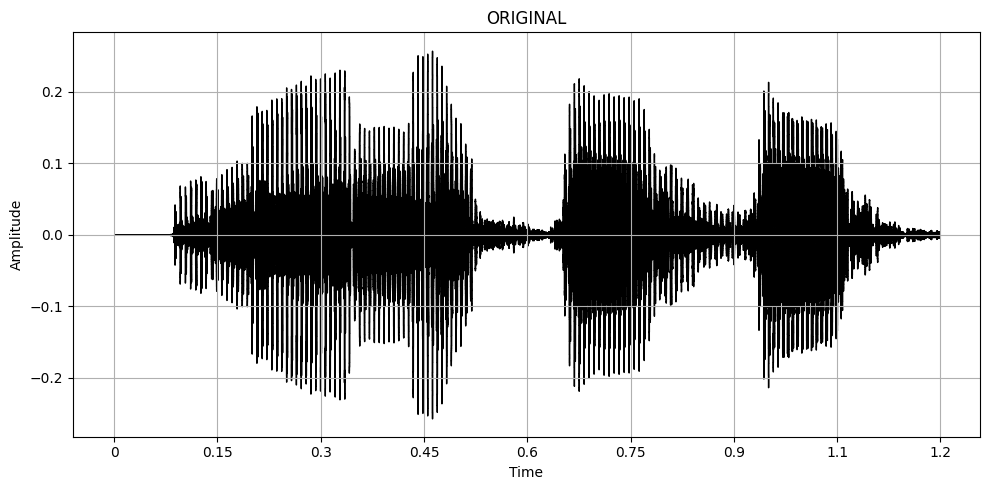

Original Signal


In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import IPython.display as ipd
y, rs = librosa.load('/content/name.ogg')
plt.figure(figsize=(10, 5))
librosa.display.waveshow(y, sr=rs,color='black')
plt.title('ORIGINAL')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()
print('Original Signal')
ipd.Audio(y, rate=rs)

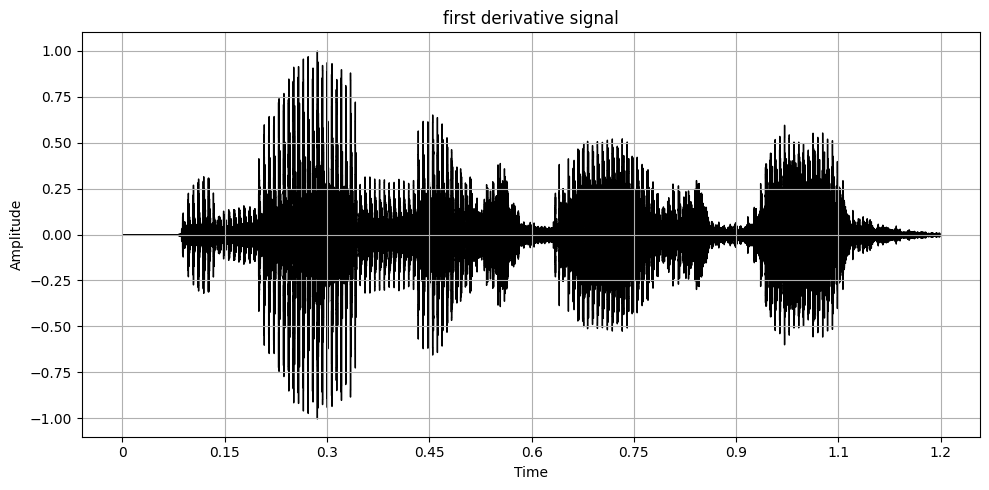

Playing First Derivative Signal:


In [3]:
y, rs = librosa.load('/content/name.ogg')
derivative_1 = np.diff(y)
derivative_1 /= np.max(np.abs(derivative_1))

plt.figure(figsize=(10, 5))
librosa.display.waveshow(derivative_1, sr=rs,color='black')
plt.title('first derivative signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Playing First Derivative Signal:")
ipd.Audio(derivative_1, rate=rs)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-4-d17c43a0ae2b>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_regions)), speech_regions, 'ro', label='Speech regions',color = 'red')
<ipython-input-4-d17c43a0ae2b>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_regions), len(speech_regions) + len(silence_regions)), silence_regions, 'bo', label='Silence regions',color = 'green')


Average length between consecutive zero crossings in speech regions: nan
Average length between consecutive zero crossings in silence regions: 4.5952670958761095


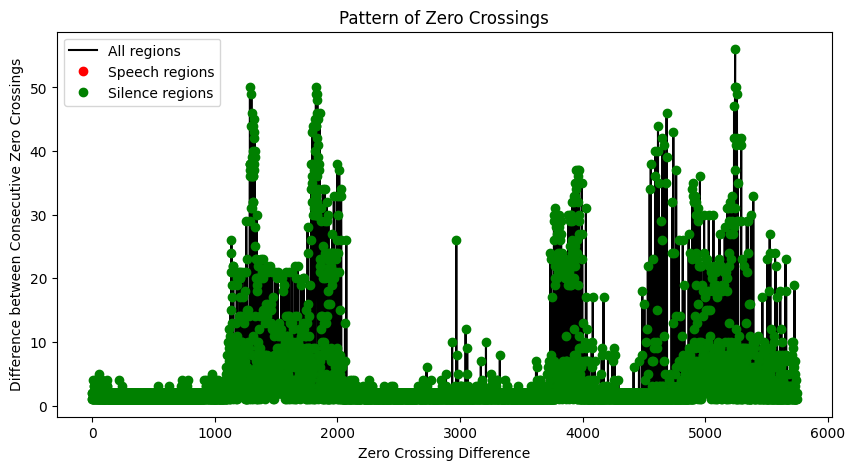

Pattern of Zero Crossings:
All regions: [2 1 1 ... 2 1 2]
Speech regions: []
Silence regions: [2 1 1 ... 2 1 2]


In [4]:
zero_crossing = np.where(np.diff(np.sign(derivative_1)))[0]
diff = np.diff(zero_crossing)
threshold = 1000
speech_regions = diff[diff > threshold]
silence_regions = diff[diff <= threshold]

avg_length_speech = np.mean(speech_regions)
avg_length_silence = np.mean(silence_regions)

print("Average length between consecutive zero crossings in speech regions:", avg_length_speech)
print("Average length between consecutive zero crossings in silence regions:", avg_length_silence)

plt.figure(figsize=(10, 5))
plt.plot(diff, label='All regions',color = 'black')
plt.plot(np.arange(len(speech_regions)), speech_regions, 'ro', label='Speech regions',color = 'red')
plt.plot(np.arange(len(speech_regions), len(speech_regions) + len(silence_regions)), silence_regions, 'bo', label='Silence regions',color = 'green')
plt.title('Pattern of Zero Crossings')
plt.xlabel('Zero Crossing Difference')
plt.ylabel('Difference between Consecutive Zero Crossings')
plt.legend()
plt.show()

print("Pattern of Zero Crossings:")
print("All regions:", diff)
print("Speech regions:", speech_regions)
print("Silence regions:", silence_regions)

Lengths of the spoken words MINE: [2.64, 2.3, 1.62, 2.72, 3.24]
Lengths of the spoken words TeamMate: [1.7978125, 2.1778125, 2.2178125, 2.3578125, 2.3778125]


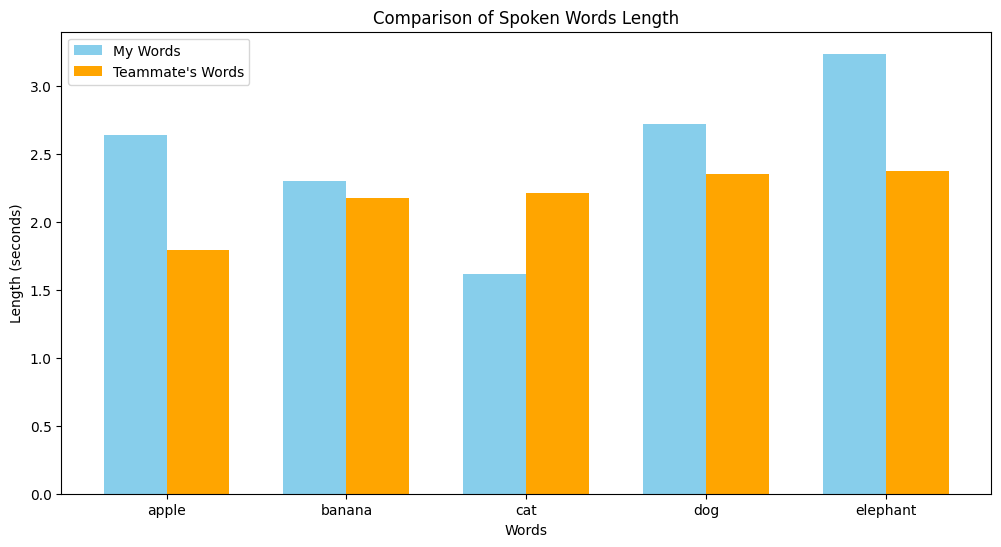

In [ ]:
word_files_mine = ['apple.wav', 'ball.wav', 'cat.wav', 'dog.wav', 'elephant.wav']
word_files_team_mate = ['apple1.ogg', 'banana1.ogg', 'cat1.ogg', 'dog1.ogg', 'elephant1.ogg']
words = ['apple', 'banana', 'cat', 'dog', 'elephant']
word_lengths_mine = []
word_lengths_teammate = []

for word_file in word_files_mine:
    signal, sr = librosa.load(word_file, sr=None)
    length_seconds = len(signal) / sr
    word_lengths_mine.append(length_seconds)

for word_file in word_files_team_mate:
    signal, sr = librosa.load(word_file, sr=None)
    length_seconds = len(signal) / sr
    word_lengths_teammate.append(length_seconds)

print("Lengths of the spoken words MINE:", word_lengths_mine)
print("Lengths of the spoken words TeamMate:", word_lengths_teammate)

bar_width = 0.35
index = np.arange(len(words))
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, word_lengths_mine, bar_width, label='My Words', color='skyblue')
plt.bar(index + bar_width/2, word_lengths_teammate, bar_width, label="Teammate's Words", color='orange')
plt.xlabel('Words')
plt.ylabel('Length (seconds)')
plt.title('Comparison of Spoken Words Length')
plt.xticks(index, words)
plt.legend()

plt.show()

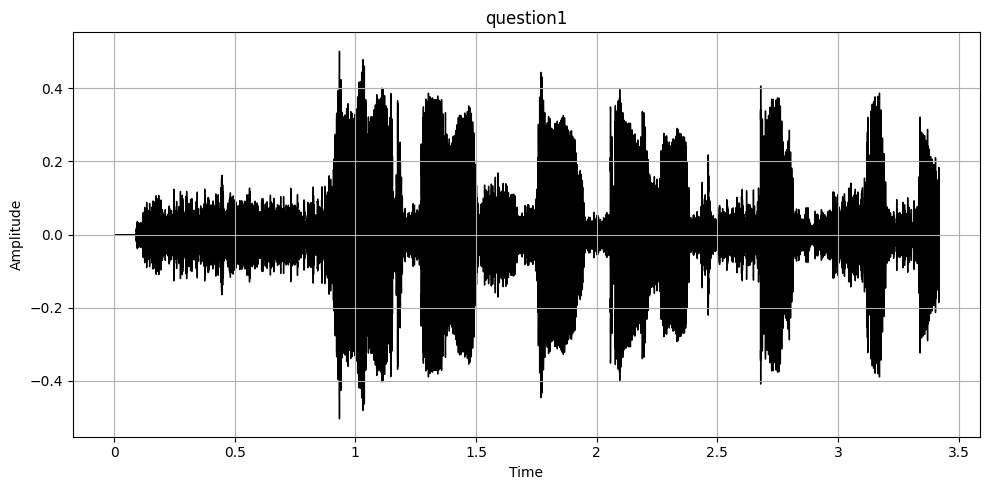

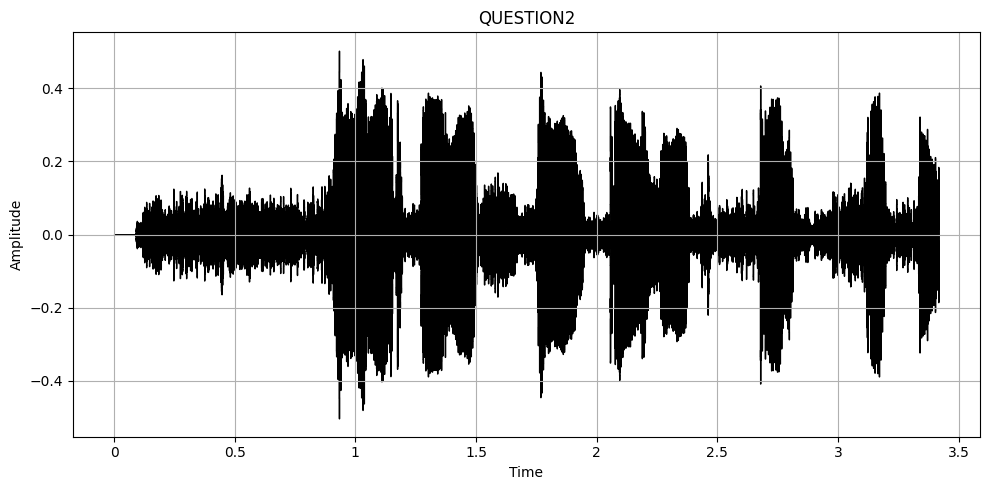

In [ ]:
statement, sr1 = librosa.load('question1.ogg')
question, sr2 = librosa.load('question2.ogg')
plt.figure(figsize=(10, 5))
librosa.display.waveshow(statement, sr=sr,color='black')
plt.title('question1')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

question, sr = librosa.load('question1.ogg')
plt.figure(figsize=(10, 5))
librosa.display.waveshow(statement, sr=sr,color='black')
plt.title('QUESTION2')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()